In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

df = pd.read_csv("creditcardcsvpresent.csv")

def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # IQR
    iqr = q75 - q25
    # outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    #print('IQR',iqr)
    #print('El limite inferior es', lower)
    #print('El limite superior es', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    print('Columna: ',column,'Numero outliners',df1.shape[0]+ df2.shape[0] )
    concat = pd.concat([df1,df2])

    dfr = pd.DataFrame (concat, columns = ['Merchant_id', 'Outliner'])
    dfr['Outliner']=1
    #print (dfr.head())
    return dfr

Columna:  Average Amount/transaction/day Numero outliners 4
Columna:  Transaction_amount Numero outliners 113
Columna:  Total Number of declines/day Numero outliners 691
Columna:  Daily_chargeback_avg_amt Numero outliners 218
Columna:  6_month_avg_chbk_amt Numero outliners 218
Columna:  6-month_chbk_freq Numero outliners 218
             Count
Merchant_id       
3160241992       6
6661273529      36
6661273530      32
6661273531      47
6661273532      50
6661273533      49
6661273534      24


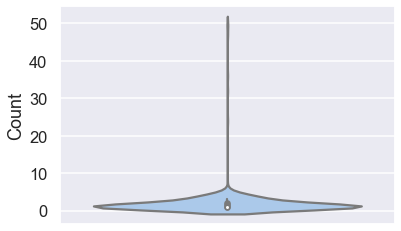

In [2]:
# Practiac 'Merchant_id',
# Método intercuartil
# usamos el cálculo del rango intercuartil para detectar los outliers. en este caso los outliers se definen como 
# si están por debajo del (Q1 − 1.5xIQR) o por encima (Q3 + 1.5x IQR)

#campos = ['Transaction date','Average Amount/transaction/day']#'Transaction_amount','Is declined','Total Number of declines/day','isForeignTransaction','isHighRiskCountry','Daily_chargeback_avg_amt','6_month_avg_chbk_amt','6-month_chbk_freq','isFradulent']
campos = ['Average Amount/transaction/day','Transaction_amount','Total Number of declines/day','Daily_chargeback_avg_amt','6_month_avg_chbk_amt','6-month_chbk_freq']

tablas = []
for columna in campos:
    tabla = out_iqr(df , columna)
    tablas.append(tabla)

result = pd.concat(tablas)
resultgb = result.groupby('Merchant_id').size().to_frame()

resultgb.columns = ['Count']
sns.violinplot(y = resultgb['Count'])
resultgb.head()

column = 0
q99 = np.quantile(resultgb['Count'], 0.99)
df1 = resultgb[resultgb['Count'] > q99]

# Resultado con los id de los consumidores
# con mas transacciones con anomalias
print(df1)
